In [575]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [576]:
# Reading the data from csv file, to check the 'Absenteeism hours' in the dataset
ds = pd.read_excel('Absenteeism_at_work.xls')
ds

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [577]:
# Checking the initial shape of the dataset as how many rows and columns are present in it
ds.shape

(740, 21)

In [578]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (740, 21)
Shape of dataset after removing duplicates:  (706, 21)


In [579]:
# Checking the columns of the dataset as on which features, 'Absenteeism time in hours' is dependent
ds.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [580]:
# Checking the datatypes of the columns
ds.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [581]:
# Checking the columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               706 non-null    int64
 1   Reason for absence               706 non-null    int64
 2   Month of absence                 706 non-null    int64
 3   Day of the week                  706 non-null    int64
 4   Seasons                          706 non-null    int64
 5   Transportation expense           706 non-null    int64
 6   Distance from Residence to Work  706 non-null    int64
 7   Service time                     706 non-null    int64
 8   Age                              706 non-null    int64
 9   Work load Average/day            706 non-null    int64
 10  Hit target                       706 non-null    int64
 11  Disciplinary failure             706 non-null    int64
 12  Education                        706 non-null    i

# Summarize the 'Absenteeism time in hours' distribution

In [582]:
ds.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [583]:
from collections import Counter

target = ds.values[:,-1]
counter = Counter(target)

for k, v in counter.items():
    per = v/len(target) * 100
    print ('Absenteeism time in hours = %s, Count=%d, Percentage=%.3f%%' %(k, v, per) )

Absenteeism time in hours = 4, Count=60, Percentage=8.499%
Absenteeism time in hours = 0, Count=44, Percentage=6.232%
Absenteeism time in hours = 2, Count=137, Percentage=19.405%
Absenteeism time in hours = 8, Count=207, Percentage=29.320%
Absenteeism time in hours = 40, Count=7, Percentage=0.992%
Absenteeism time in hours = 1, Count=85, Percentage=12.040%
Absenteeism time in hours = 7, Count=1, Percentage=0.142%
Absenteeism time in hours = 3, Count=102, Percentage=14.448%
Absenteeism time in hours = 32, Count=6, Percentage=0.850%
Absenteeism time in hours = 5, Count=7, Percentage=0.992%
Absenteeism time in hours = 16, Count=19, Percentage=2.691%
Absenteeism time in hours = 24, Count=16, Percentage=2.266%
Absenteeism time in hours = 64, Count=3, Percentage=0.425%
Absenteeism time in hours = 56, Count=2, Percentage=0.283%
Absenteeism time in hours = 80, Count=3, Percentage=0.425%
Absenteeism time in hours = 120, Count=3, Percentage=0.425%
Absenteeism time in hours = 112, Count=2, Percen

In [584]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [585]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index([], dtype='object')

# Statistical Summary

In [586]:
ds.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,18.192635,18.882436,6.410765,3.890935,2.549575,222.977337,29.297450,12.495751,36.478754,272089.984419,...,0.056657,1.291785,1.060907,0.565156,0.076487,0.769122,79.005666,172.202550,26.635977,7.143059
std,10.927472,8.482877,3.404811,1.425503,1.121527,67.293426,14.706661,4.370190,6.563404,39458.780251,...,0.231350,0.671499,1.104717,0.496088,0.265965,1.333351,12.862501,6.159814,4.254901,13.608120
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264604.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,28.000000,26.000000,9.750000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Here, sometimes mean is greater than median and sometimes median is greater than mean

In [587]:
# Checking for null values
ds.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [588]:
# Checking for NaN values
ds.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

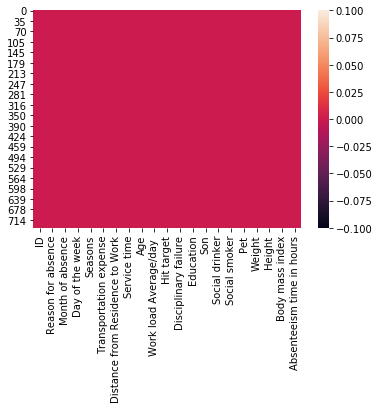

In [589]:
# Null values check through heatmap visualization
sns.heatmap(ds.isnull())

# Checking the unique values of columns of dataset

In [590]:
ds['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [591]:
ds['Month of absence'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0], dtype=int64)

In [592]:
ds['Day of the week'].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [593]:
ds['Seasons'].unique()

array([1, 4, 2, 3], dtype=int64)

In [594]:
ds['Transportation expense'].unique()

array([289, 118, 179, 279, 361, 260, 155, 235, 246, 189, 248, 330, 157,
       291, 184, 225, 369, 388, 378, 228, 300, 268, 231, 233], dtype=int64)

In [595]:
ds['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53], dtype=int64)

In [596]:
ds['Disciplinary failure'].unique()

array([0, 1], dtype=int64)

In [597]:
ds['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [598]:
ds['Hit target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

In [599]:
ds['Work load Average/day '].unique()

array([239554, 205917, 241476, 253465, 306345, 261306, 308593, 302585,
       343253, 326452, 378884, 377550, 275312, 265615, 294217, 265017,
       284031, 236629, 330061, 251818, 244387, 239409, 246074, 253957,
       230290, 249797, 261756, 284853, 268519, 280549, 313532, 264249,
       222196, 246288, 237656, 275089, 264604, 271219], dtype=int64)

In [600]:
ds['Social smoker'].unique()

array([0, 1], dtype=int64)

# 'Absenteeism time in hours' based on some features

In [601]:
ds.groupby(['Reason for absence'])['Absenteeism time in hours'].count()

Reason for absence
0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     37
23    142
24      3
25     31
26     33
27     47
28    108
Name: Absenteeism time in hours, dtype: int64

In [602]:
ds.groupby(['Seasons'])['Absenteeism time in hours'].count()

Seasons
1    167
2    173
3    177
4    189
Name: Absenteeism time in hours, dtype: int64

In [603]:
ds.groupby(['Distance from Residence to Work'])['Absenteeism time in hours'].count()

Distance from Residence to Work
5       6
10     50
11     26
12     29
13     34
14      9
15      9
16     26
17     15
20     18
22     20
25     52
26    121
27      7
29     14
31     36
35      2
36     40
42      6
45      1
48      5
49      8
50     45
51    104
52     23
Name: Absenteeism time in hours, dtype: int64

In [604]:
ds.groupby(['Disciplinary failure'])['Absenteeism time in hours'].count()

Disciplinary failure
0    666
1     40
Name: Absenteeism time in hours, dtype: int64

In [605]:
ds.groupby(['Education'])['Absenteeism time in hours'].count()

Education
1    582
2     46
3     74
4      4
Name: Absenteeism time in hours, dtype: int64

In [606]:
ds.groupby(['Social drinker'])['Absenteeism time in hours'].count()

Social drinker
0    307
1    399
Name: Absenteeism time in hours, dtype: int64

In [607]:
ds.groupby(['Social smoker'])['Absenteeism time in hours'].count()

Social smoker
0    652
1     54
Name: Absenteeism time in hours, dtype: int64

In [608]:
ds.groupby(['Body mass index'])['Absenteeism time in hours'].count()

Body mass index
19     41
21     21
22     35
23     73
24     84
25    125
27     23
28     54
29     23
30     40
31    131
32     24
33      6
34      1
35      2
36      5
38     18
Name: Absenteeism time in hours, dtype: int64

In [609]:
ds.groupby(['Pet'])['Absenteeism time in hours'].count()

Pet
0    430
1    137
2     94
4     31
5      6
8      8
Name: Absenteeism time in hours, dtype: int64

# checking the corelation

In [610]:
ds.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.051415,-0.016464,0.052253,0.093084,-0.235402,-0.457699,-0.241819,0.056145,0.069316,...,0.000726,-0.053098,-0.012018,-0.429081,-0.015814,-0.053018,-0.234752,0.070140,-0.284586,-0.023517
Reason for absence,-0.051415,1.000000,-0.060549,0.104978,-0.113816,-0.100801,0.149225,0.033600,-0.080563,-0.112523,...,-0.545903,-0.049748,-0.022999,0.060977,-0.106660,-0.039273,-0.003361,-0.069254,0.029780,-0.162592
Month of absence,-0.016464,-0.060549,1.000000,0.007490,0.399176,0.110558,0.016847,-0.043352,0.003120,-0.182005,...,0.105467,-0.069248,0.051791,0.063071,-0.047275,0.022169,0.033404,-0.077826,0.067418,0.015598
Day of the week,0.052253,0.104978,0.007490,1.000000,0.049079,0.045192,0.101956,0.015522,0.014685,0.030620,...,-0.011344,0.043666,0.118616,0.043158,0.018293,-0.021476,-0.124129,-0.079219,-0.100332,-0.121380
Seasons,0.093084,-0.113816,0.399176,0.049079,1.000000,0.028470,-0.053784,0.011764,-0.000531,0.151678,...,0.153163,-0.013584,0.037057,-0.033858,-0.050773,-0.001346,-0.019980,-0.035642,-0.002901,-0.008040
Transportation expense,-0.235402,-0.100801,0.110558,0.045192,0.028470,1.000000,0.278116,-0.353104,-0.233401,0.003768,...,0.105406,-0.054943,0.369243,0.140514,0.038218,0.388217,-0.210530,-0.204651,-0.133785,0.018275
Distance from Residence to Work,-0.457699,0.149225,0.016847,0.101956,-0.053784,0.278116,1.000000,0.097899,-0.155833,-0.046458,...,-0.052903,-0.260157,0.078245,0.436337,-0.071462,0.222901,-0.074094,-0.355345,0.089978,-0.084683
Service time,-0.241819,0.033600,-0.043352,0.015522,0.011764,-0.353104,0.097899,1.000000,0.673505,0.019649,...,0.003044,-0.201619,-0.031530,0.331185,0.078383,-0.437239,0.446540,-0.047838,0.489227,0.025472
Age,0.056145,-0.080563,0.003120,0.014685,-0.000531,-0.233401,-0.155833,0.673505,1.000000,-0.036579,...,0.104483,-0.211326,0.057400,0.199947,0.122004,-0.228693,0.410335,-0.064922,0.465711,0.065822
Work load Average/day,0.069316,-0.112523,-0.182005,0.030620,0.151678,0.003768,-0.046458,0.019649,-0.036579,1.000000,...,0.025729,-0.070154,0.014300,-0.016067,0.027067,-0.001839,-0.037382,0.099957,-0.088938,0.020150


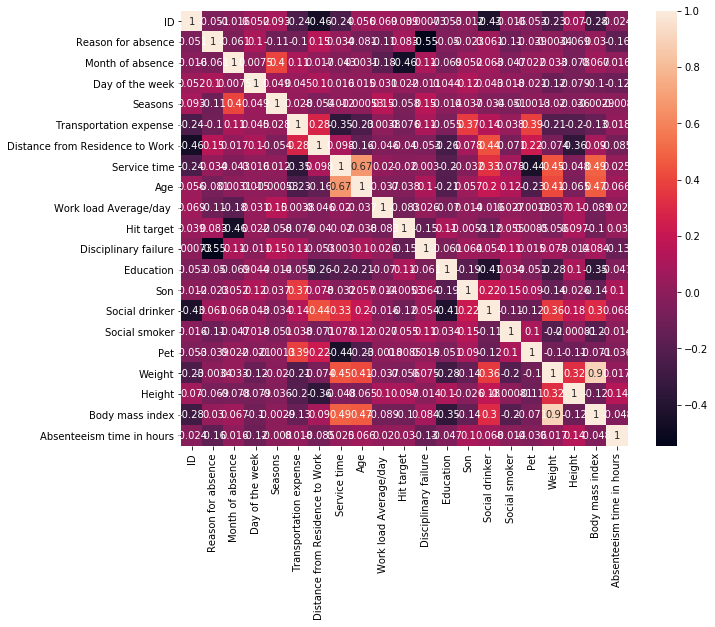

In [611]:
# Corelation through heatmap
plt.figure(figsize=(10,8))
sns.heatmap(ds.corr(), annot=True)

Above heatmap shows, data is weakly corelated

# Plotting outliers

Univariate Analysis

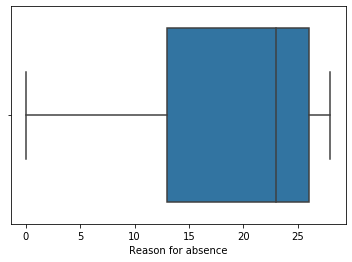

In [612]:
sns.boxplot(ds['Reason for absence'])
plt.show()

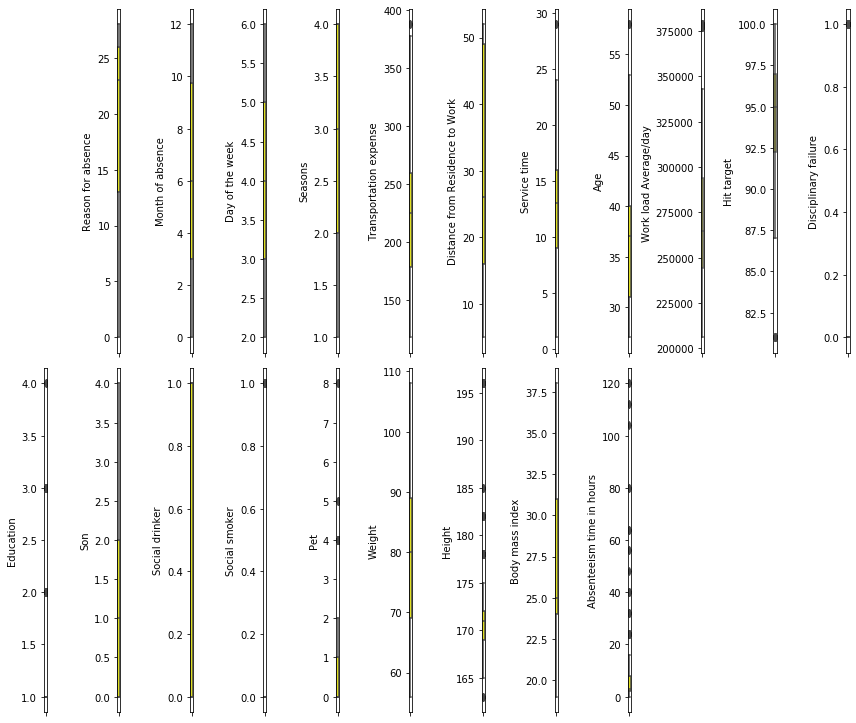

In [613]:
# Boxplot for all the columns
collist = ds.columns.values
nrows = 12
ncols = 12

plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

Above boxplot shows outliers are present in the dataset

# Histograms

<Figure size 864x1080 with 0 Axes>

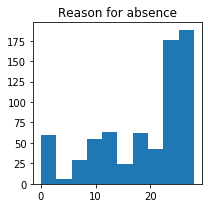

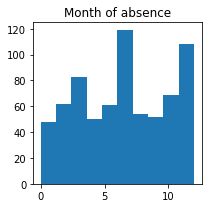

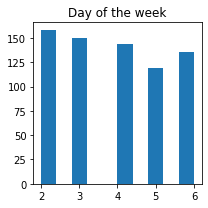

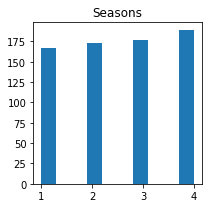

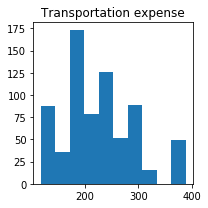

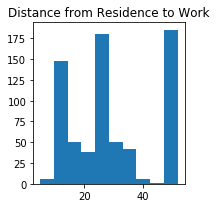

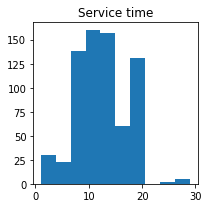

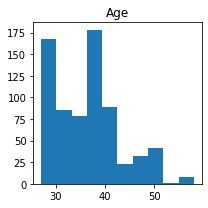

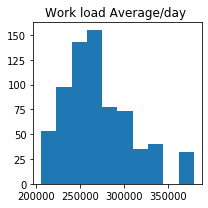

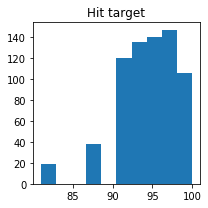

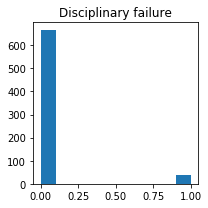

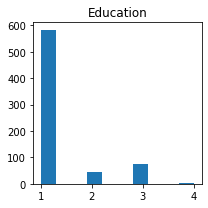

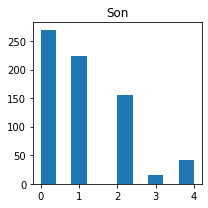

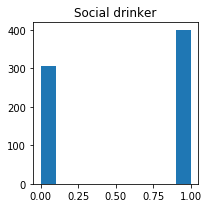

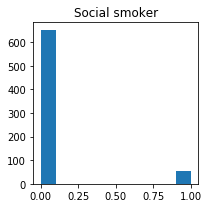

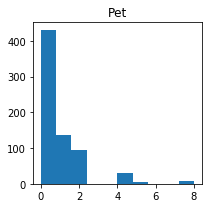

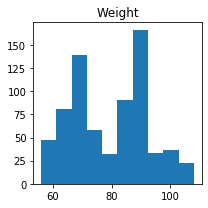

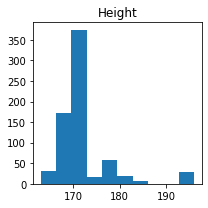

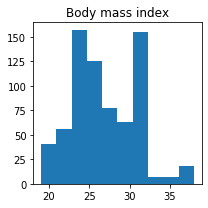

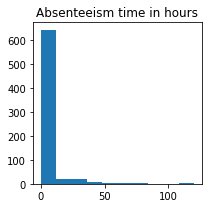

In [614]:
# Histogram for all the columns
plt.figure(figsize=(12, 15))
for i in range(1, len(collist)):
    plt.figure(figsize=(3,3))
    plt.title(collist[i])
    plt.hist(ds[collist[i]])
    plt.tight_layout()

# Violinplot

It shows where the maximum values of data lies

<Figure size 864x1080 with 0 Axes>

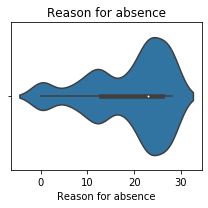

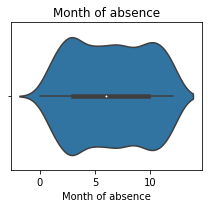

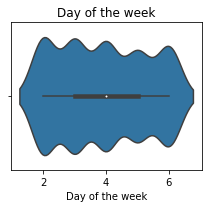

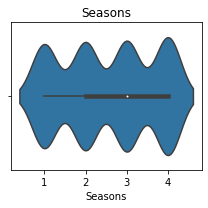

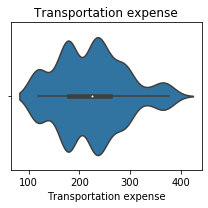

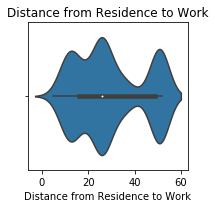

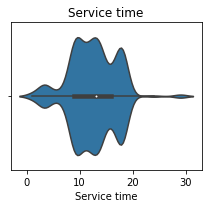

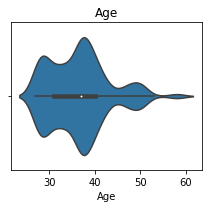

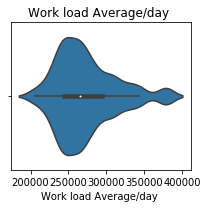

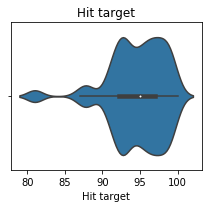

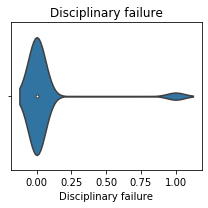

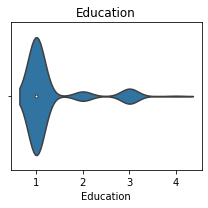

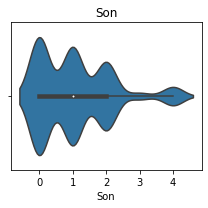

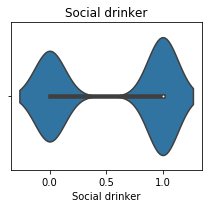

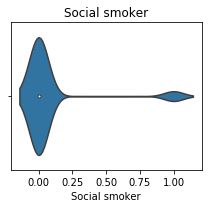

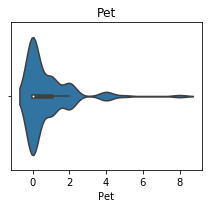

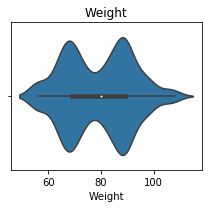

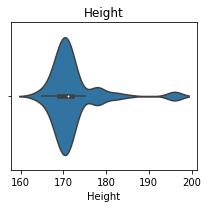

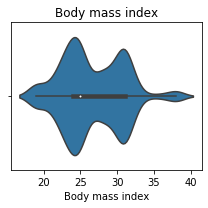

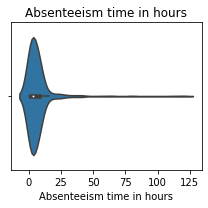

In [615]:
# Violinplot for all the columns
plt.figure(figsize=(12, 15))
for i in range(1, len(collist)):
    plt.figure(figsize=(3,3))
    plt.title(collist[i])
    sns.violinplot(ds[collist[i]])
    plt.tight_layout()

# Distribution plots to check the skewness of data

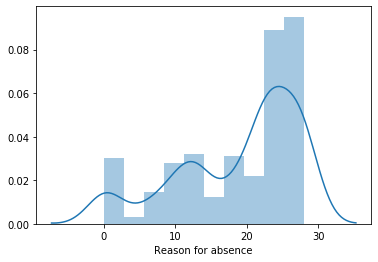

In [616]:
sns.distplot(ds['Reason for absence'])
plt.show()

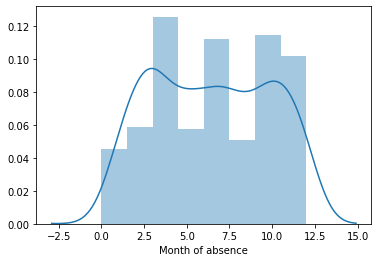

In [617]:
sns.distplot(ds['Month of absence'])
plt.show()

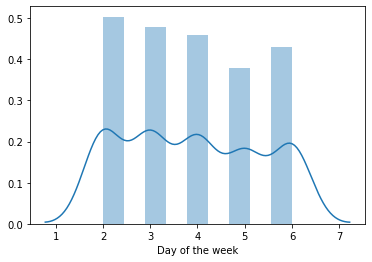

In [618]:
sns.distplot(ds['Day of the week'])
plt.show()

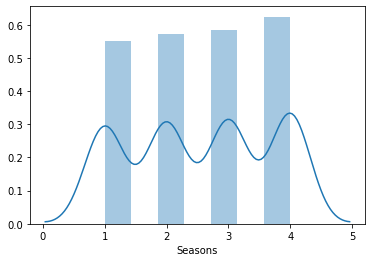

In [619]:
sns.distplot(ds['Seasons'])
plt.show()

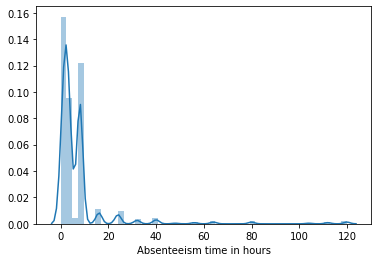

In [620]:
sns.distplot(ds['Absenteeism time in hours'])
plt.show()

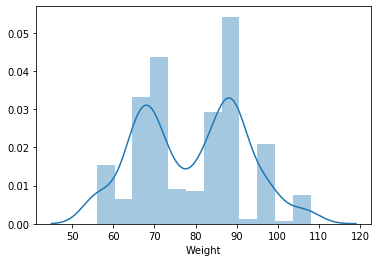

In [621]:
sns.distplot(ds['Weight'])
plt.show()

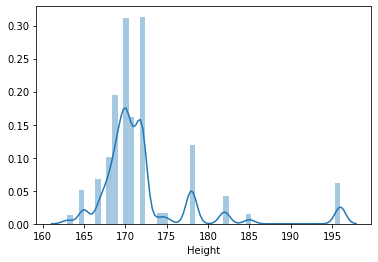

In [622]:
sns.distplot(ds['Height'])
plt.show()

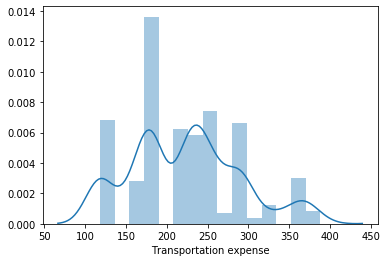

In [623]:
sns.distplot(ds['Transportation expense'])
plt.show()

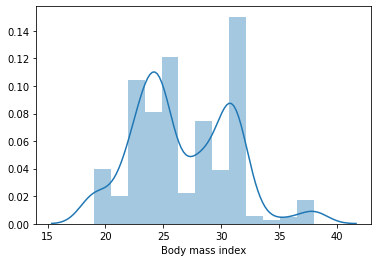

In [624]:
sns.distplot(ds['Body mass index'])
plt.show()

Distribution plot shows data is skewed

# Bivariate Analysis

Barplot

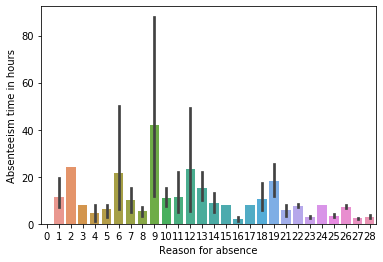

In [625]:
sns.barplot(x='Reason for absence', y='Absenteeism time in hours' , data=ds)
plt.show()

More 'Absenteeism time in hours' is present in reason '9'

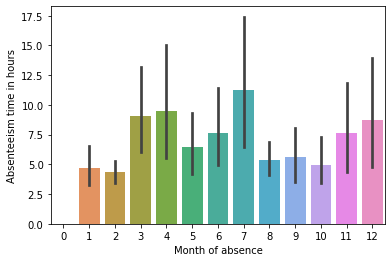

In [626]:
sns.barplot(x='Month of absence', y='Absenteeism time in hours' , data=ds)
plt.show()

More 'Absenteeism time in hours' is present in month '7'

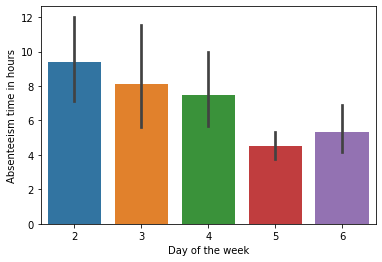

In [627]:
sns.barplot(x='Day of the week', y='Absenteeism time in hours' , data=ds)
plt.show()

'2nd' day of the week has more 'Absenteeism time in hours'

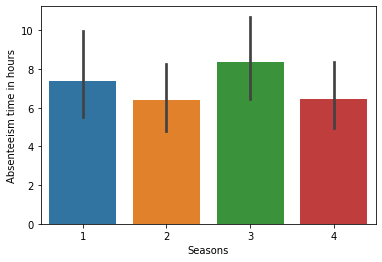

In [628]:
sns.barplot(x='Seasons', y='Absenteeism time in hours' , data=ds)
plt.show()

'3rd' season has more 'Absenteeism time in hours'

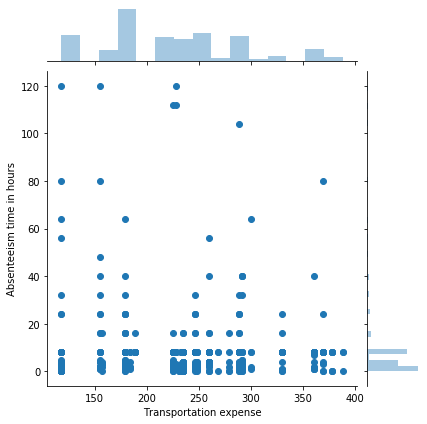

In [629]:
sns.jointplot(data=ds, x="Transportation expense", y="Absenteeism time in hours" )
plt.show()

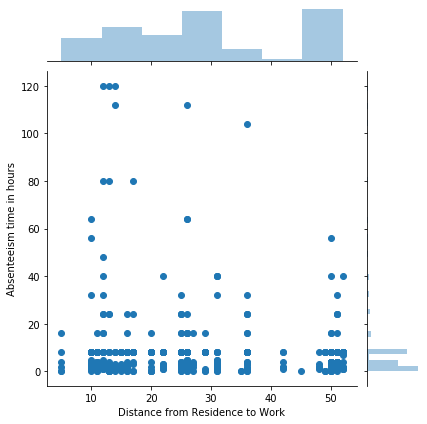

In [630]:
sns.jointplot(data=ds, x="Distance from Residence to Work", y="Absenteeism time in hours" )
plt.show()

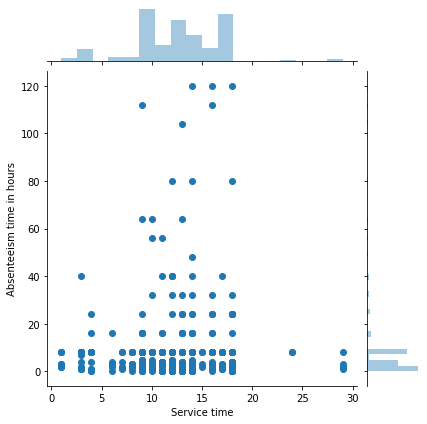

In [631]:
sns.jointplot(data=ds, x="Service time", y="Absenteeism time in hours" )
plt.show()

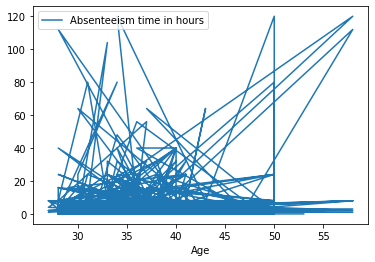

In [632]:
ds.plot(x='Age', y='Absenteeism time in hours', kind = 'line')
plt.show()

As 'Age' increases 'Absenteeism time in hours' increases

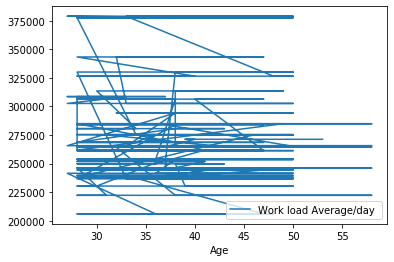

In [633]:
ds.plot(x='Age', y='Work load Average/day ', kind = 'line')
plt.show()

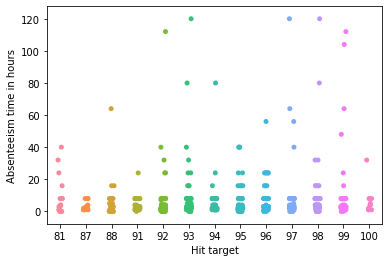

In [634]:
sns.stripplot(x='Hit target', y='Absenteeism time in hours', data=ds)
plt.show()

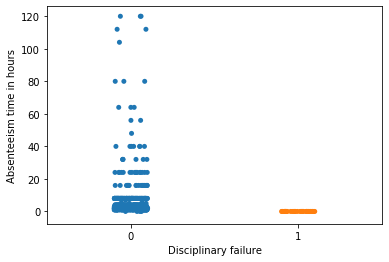

In [635]:
sns.stripplot(x='Disciplinary failure', y='Absenteeism time in hours', data=ds)
plt.show()

Disciplinary failure '0' has more 'Absenteeism time in hours'

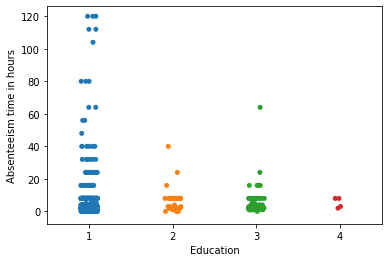

In [636]:
sns.stripplot(x='Education', y='Absenteeism time in hours', data=ds)
plt.show()

Education '1' has more 'Absenteeism time in hours'

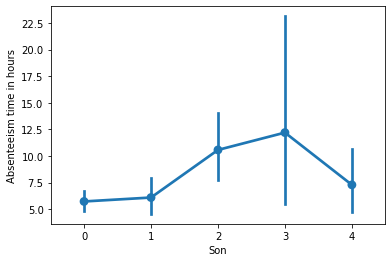

In [637]:
sns.pointplot(x='Son', y='Absenteeism time in hours', data=ds)
plt.show()

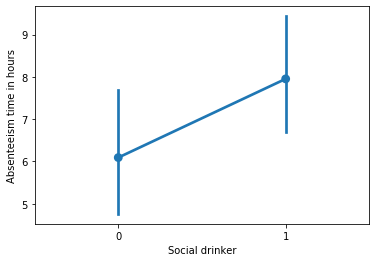

In [638]:
sns.pointplot(x='Social drinker', y='Absenteeism time in hours', data=ds)
plt.show()

Social drinker '1' has more 'Absenteeism time in hours'

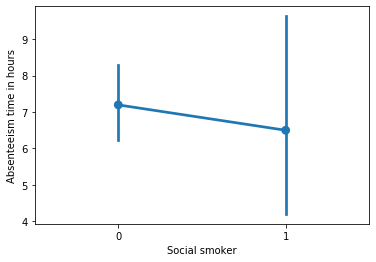

In [639]:
sns.pointplot(x='Social smoker', y='Absenteeism time in hours', data=ds)
plt.show()

Social smoker '1' has more 'Absenteeism time in hours'

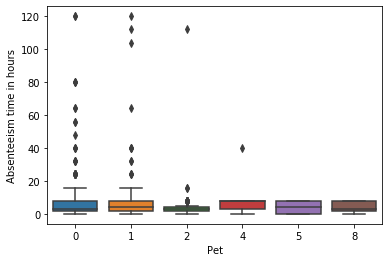

In [640]:
sns.boxplot(x='Pet', y='Absenteeism time in hours', data=ds)
plt.show()

Pet '0' and '1' has more 'Absenteeism time in hours'

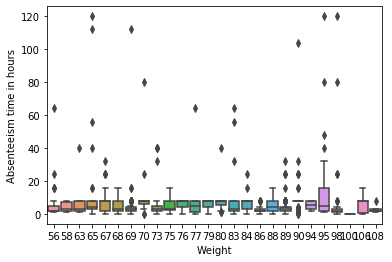

In [641]:
sns.boxplot(x='Weight', y='Absenteeism time in hours', data=ds)
plt.show()

'Absenteeism time in hours' is random for 'Weight'

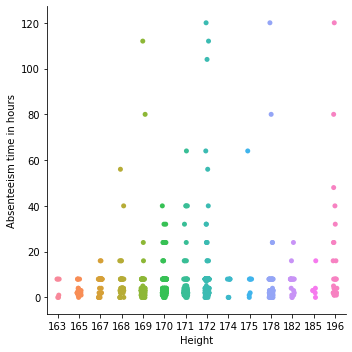

In [642]:
sns.catplot(x='Height', y='Absenteeism time in hours' ,data=ds)
plt.show()

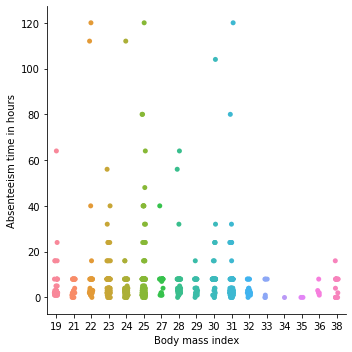

In [643]:
sns.catplot(x='Body mass index', y='Absenteeism time in hours' ,data=ds)
plt.show()

# Countplot

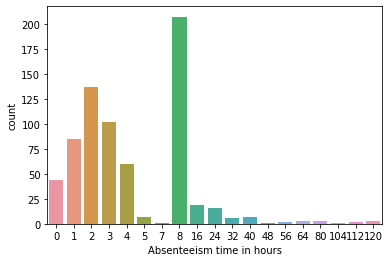

In [644]:
sns.countplot(ds['Absenteeism time in hours'])
plt.show()

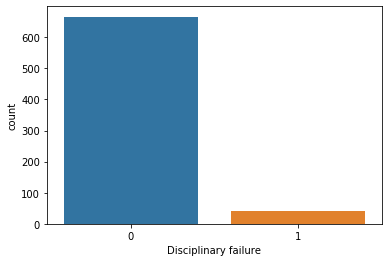

In [645]:
sns.countplot(ds['Disciplinary failure'])
plt.show()

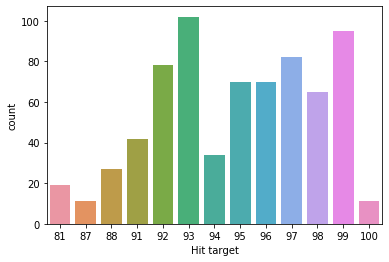

In [646]:
sns.countplot(ds['Hit target'])
plt.show()

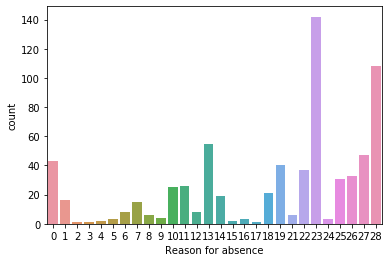

In [647]:
sns.countplot(ds['Reason for absence'])
plt.show()

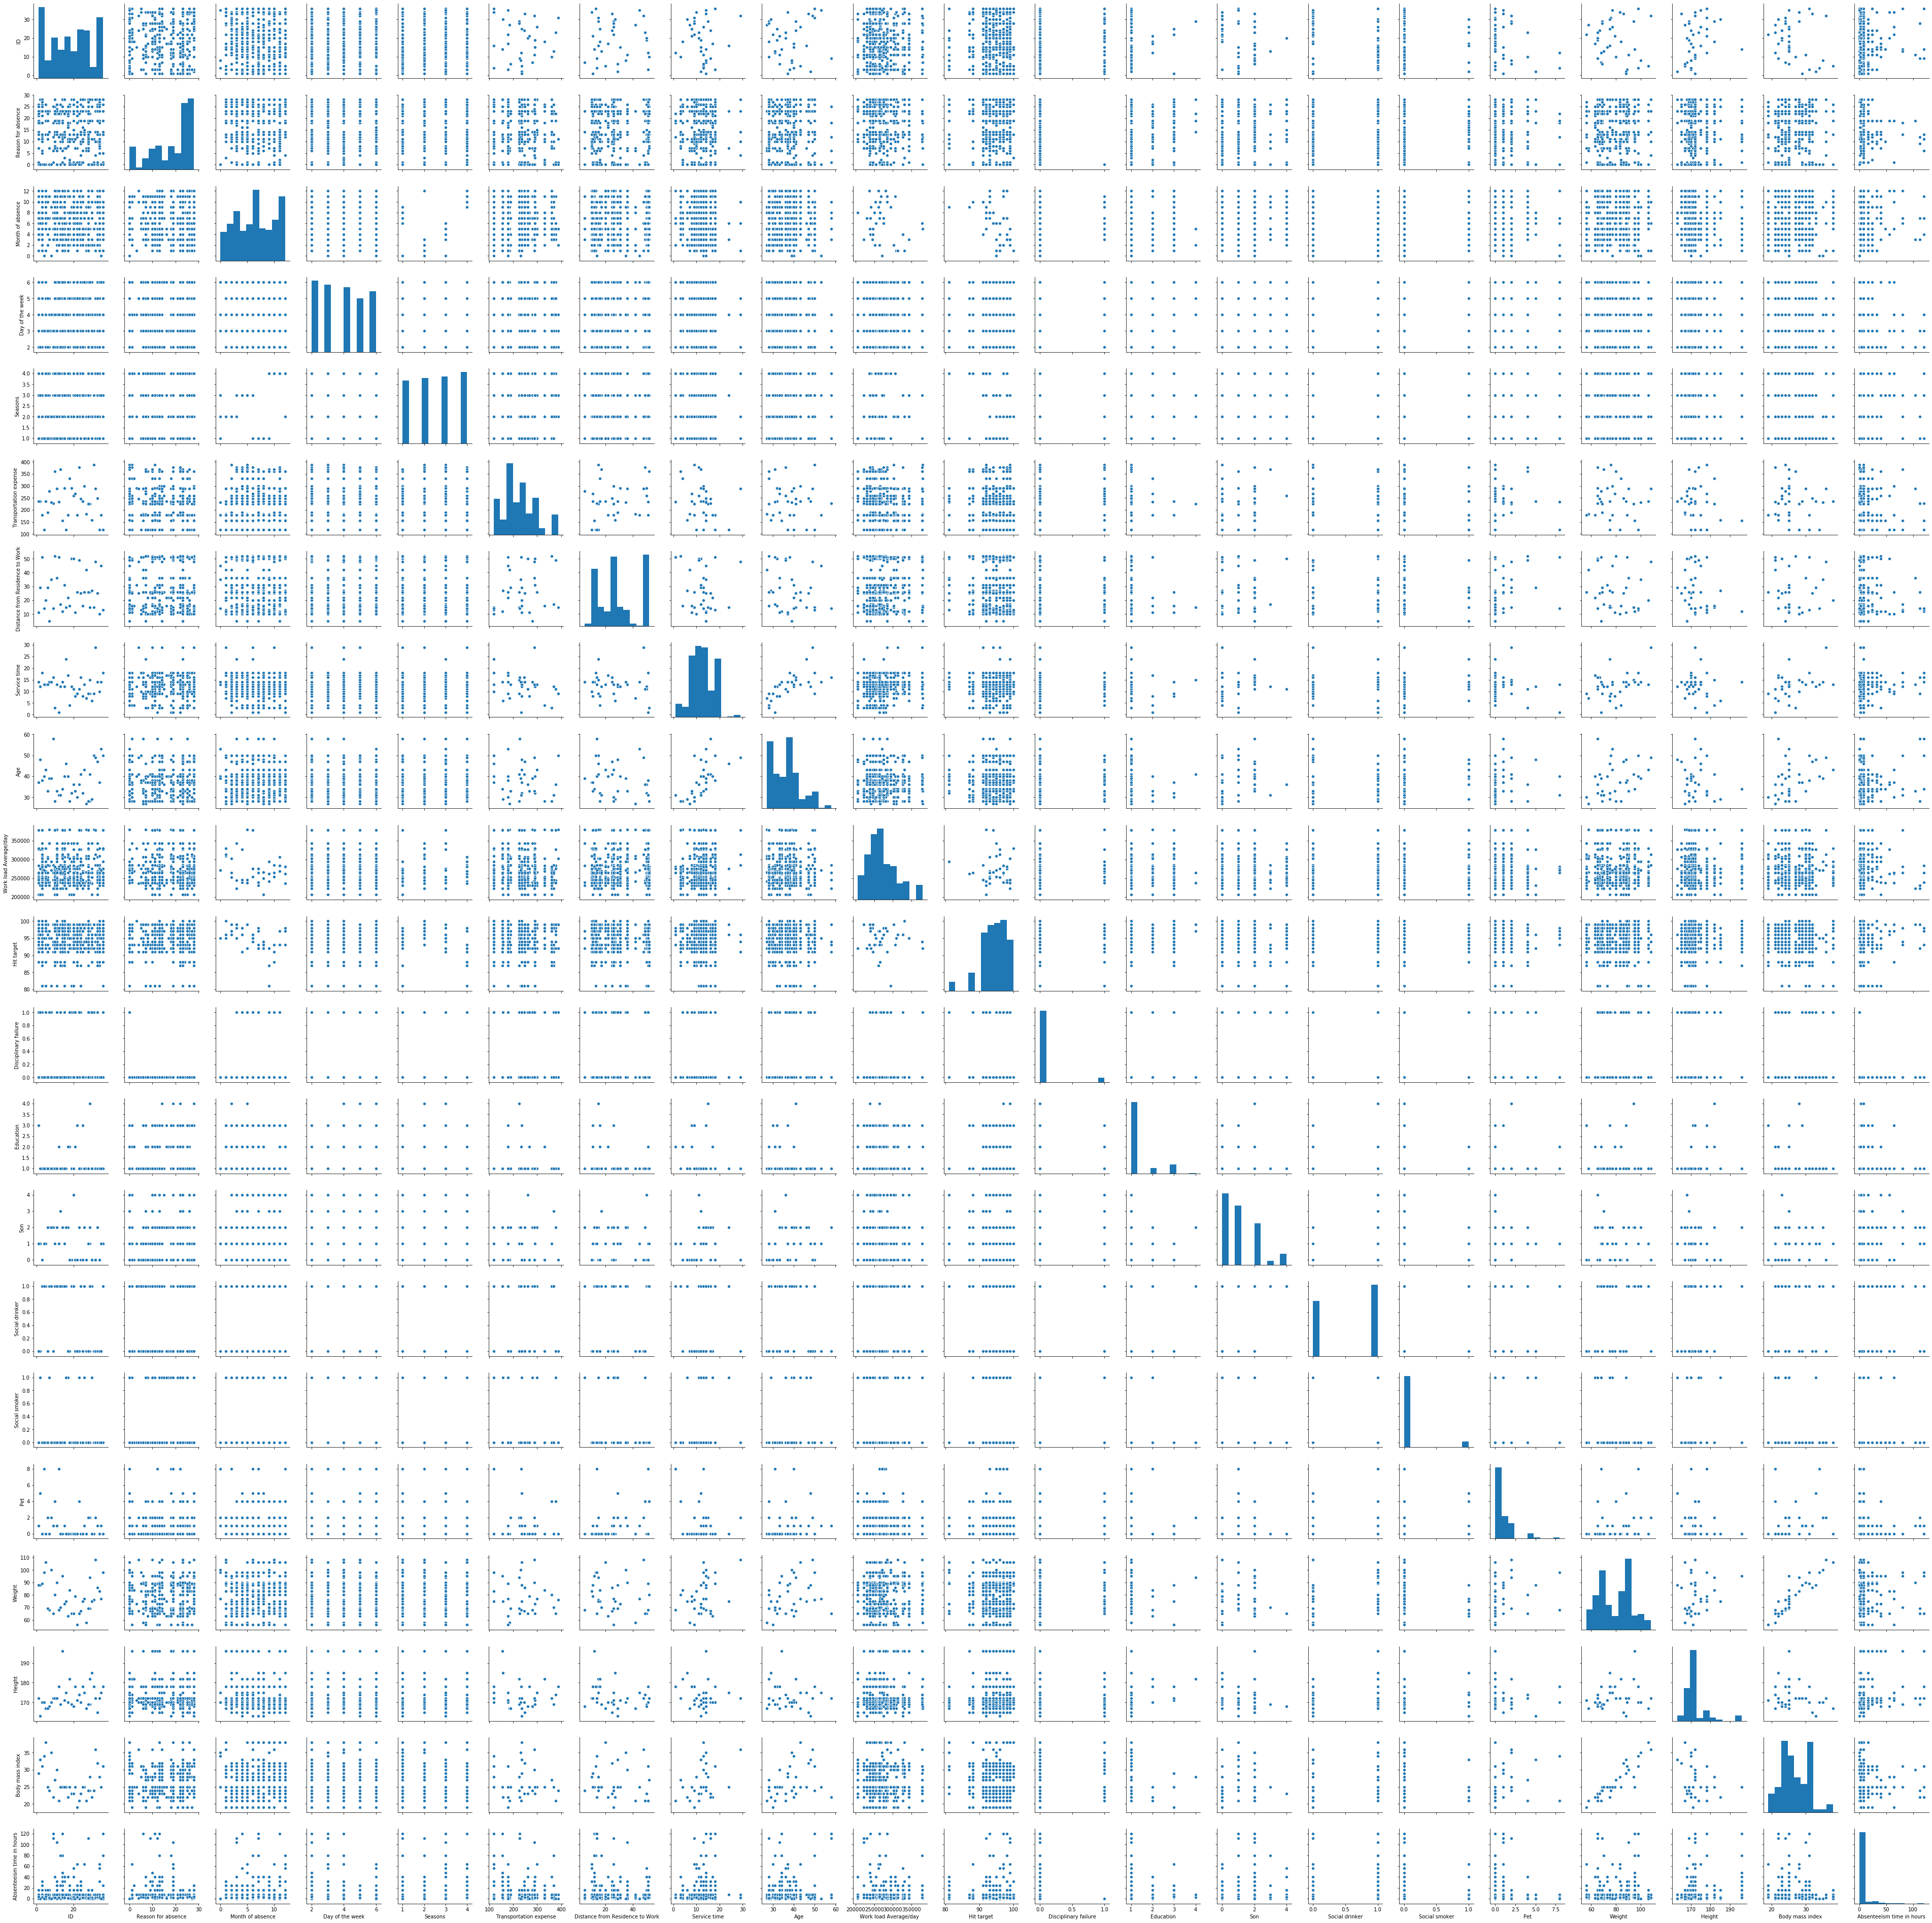

In [648]:
# Pairplot
sns.pairplot(ds)
plt.show()

# Removing Outliers

In [649]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (706, 21)
After removing zscore:  (542, 21)


In [650]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Absenteeism time in hours'])
y = ds_final['Absenteeism time in hours']

In [651]:
y.unique()

array([ 4,  2,  8,  1, 40,  7,  3, 32,  5, 16, 24,  0], dtype=int64)

In [652]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [653]:
(x.shape, y.shape)

((542, 20), (542,))

In [654]:
x.skew()

ID                                -0.080964
Reason for absence                -0.951528
Month of absence                   0.064943
Day of the week                    0.110272
Seasons                           -0.044254
Transportation expense             0.270779
Distance from Residence to Work    0.236537
Service time                      -0.149504
Age                                0.546612
Work load Average/day              1.001618
Hit target                        -0.432016
Disciplinary failure               0.000000
Education                          1.989673
Son                                1.380739
Social drinker                    -0.170829
Social smoker                      0.000000
Pet                                1.664749
Weight                            -0.089528
Height                             1.403684
Body mass index                    0.079653
dtype: float64

In [655]:
# Remove skewness 
for i in range (1, 8):
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col])

In [656]:
x.skew()

ID                                -0.080964
Reason for absence                -0.951528
Month of absence                   0.064943
Day of the week                    0.110272
Seasons                           -0.044254
Transportation expense             0.270779
Distance from Residence to Work    0.236537
Service time                      -0.149504
Age                                0.546612
Work load Average/day              0.185862
Hit target                        -0.432016
Disciplinary failure               0.000000
Education                         -1.678666
Son                                0.585779
Social drinker                    -0.170829
Social smoker                      0.000000
Pet                                0.504345
Weight                            -0.089528
Height                             0.345128
Body mass index                    0.079653
dtype: float64

In [657]:
x.replace(np.nan, 0, inplace=True)

# Classification algorithm for target as 'Absenteeism time in hours'

In [658]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [659]:
# algorithms used for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [660]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [661]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  64  is:  0.45871559633027525
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [2 2 8 8 8 2 2 8 8 1 8 2 2 1 2 4 8 1 1 2 2 1 2 8 2 2 2 1 2 8 4 2 1 1 8 1 8
 4 2 4 3 2 8 3 8 1 8 4 1 3 2 3 8 3 2 3 8 8 8 3 8 8 1 8 4 8 1 2 3 8 8 3 3 8
 3 8 8 8 8 2 8 1 1 8 1 2 3 4 8 1 3 8 3 8 8 8 1 3 4 2 3 8 1 8 8 8 1 8 3]


Accuracy score:  0.45871559633027525


cross val score:  0.3616161616161616


[0.         0.40206186 0.4742268  0.64948454 0.84536082 1.        ] [0.         0.16666667 0.25       0.25       0.58333333 1.        ] [9 8 4 3 2 1]
roc auc score:  0.2963917525773196


classification report:                precision    recall  f1-score   support

           1       0.25      0.42      0.31        12
           2       0.48      0.50      0.

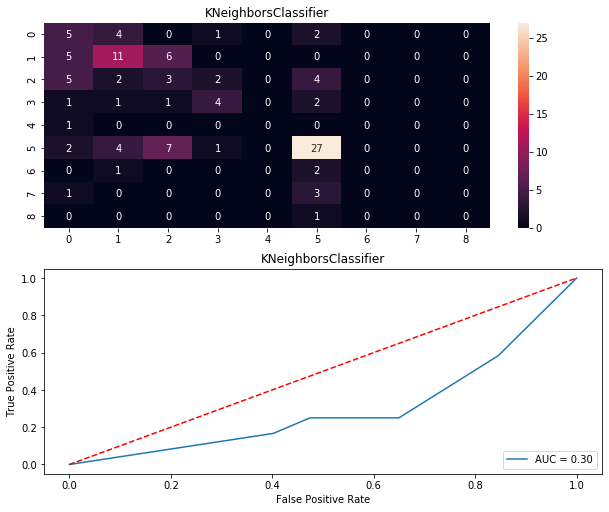

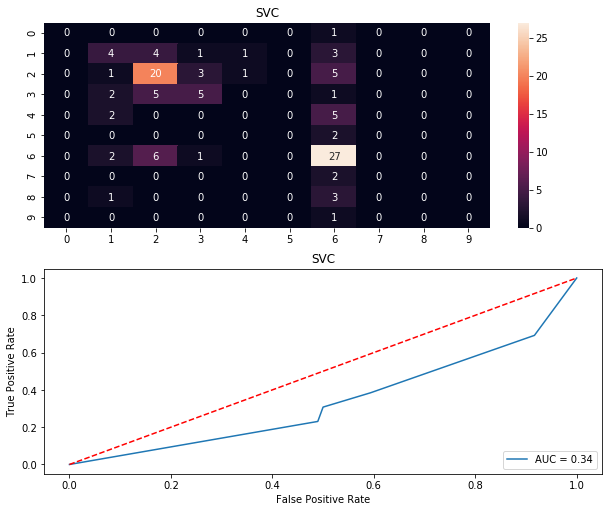

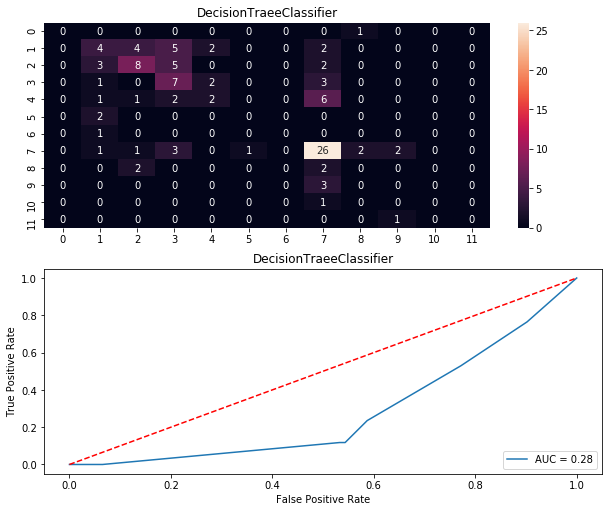

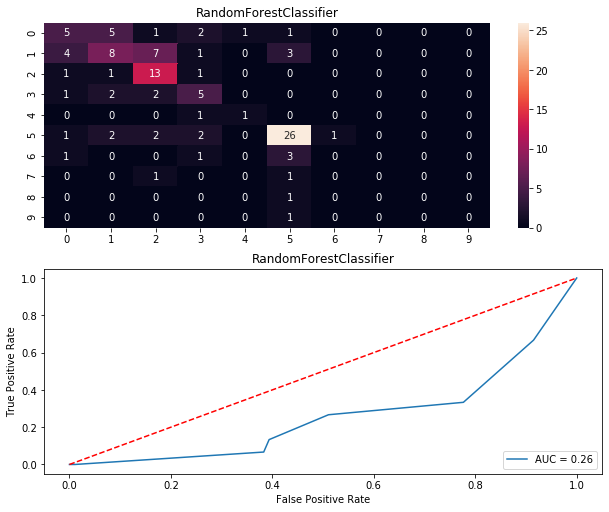

In [662]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [663]:
# Displaying the data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,45.871560,36.161616,29.639175,64
1,SVC,51.376147,42.986532,33.613782,54
2,DecisionTraeeClassifier,43.119266,26.929293,27.781330,75
3,RandomForestClassifier,53.211009,35.976431,25.673759,48


In [664]:
#Using the best model for gridsearchcv

parameters = { 'C' : [0.001, 0.01, 0.0001, 1, 10], 'kernel' : ['poly', 'rbf', 'linear'], 'gamma': [1,0.1, 0.01]}

gsc = GridSearchCV(estimator = SV, param_grid = parameters, cv=10)

In [665]:
gsc.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.0001, 1, 10],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [666]:
gsc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Need to predict the 'Absenteeism time in hours' by selecting the best model

In [674]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=54, test_size = 0.20)
svc = SVC(C= 10, gamma= 0.01, kernel= 'rbf' )
svc.fit(x_train, y_train)
y_pred =  svc.predict(x_test)
print (y_pred)

[3 8 1 2 2 1 8 2 8 2 2 8 8 8 2 2 8 8 1 8 8 8 3 8 8 2 8 3 2 8 8 8 4 2 2 4 8
 8 2 1 2 8 8 8 4 8 2 2 3 2 2 8 8 8 8 8 1 8 8 8 2 2 1 1 1 8 1 1 2 4 8 2 8 3
 1 8 1 8 2 8 8 2 2 2 8 2 2 8 8 2 3 8 2 2 2 1 4 8 8 8 8 2 2 2 8 3 3 2 8]


In [675]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_absenteeism.csv')

accuracy score:  0.5137614678899083
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.23      0.23      0.23        13
           2       0.60      0.70      0.65        30
           3       0.25      0.15      0.19        13
           4       0.40      0.29      0.33         7
           5       0.00      0.00      0.00         2
           8       0.58      0.78      0.67        36
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          40       0.00      0.00      0.00         1

    accuracy                           0.51       109
   macro avg       0.21      0.21      0.21       109
weighted avg       0.44      0.51      0.47       109

Confusion_matrix:  [[ 0  0  0  0  0  0  1  0  0  0]
 [ 0  3  3  2  1  0  4  0  0  0]
 [ 0  2 21  3  2  0  2  0  0  0]
 [ 0  3  6  2  0  0  2  0  0  0]
 [ 0  2  0  0  2  0  3  0  0

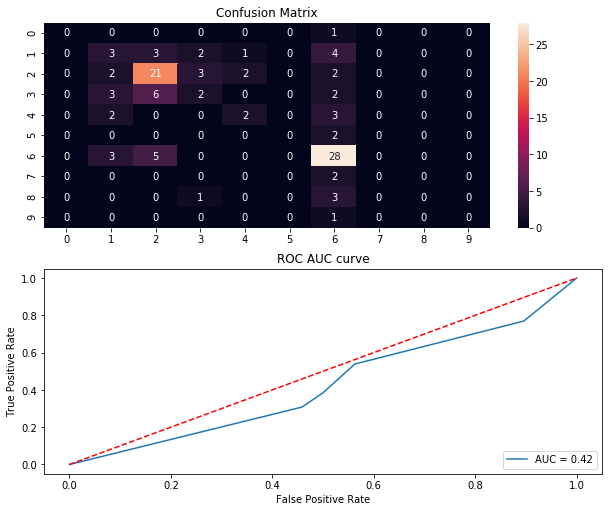

In [676]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(svc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [677]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(svc, 'Project_Absenteeism.pkl')
#clf = joblib.load('Project_Absenteeism.pkl')
#clf.predict(x_test)

['Project_Absenteeism.pkl']